In [14]:
import keras
import tensorflow as tf
from keras import backend as K
import sys
import sklearn as sk
import pandas as pd
K.tensorflow_backend._get_available_gpus()
print("Tensor Flow Version {}".format(tf.__version__))
print("Keras Version: {}".format(keras.__version__))
print()
print("Python: {}".format(sys.version))
print("Pandas: {}".format(pd.__version__))
print("Scikit-Learn: {}".format(sk.__version__))

Tensor Flow Version 1.12.0
Keras Version: 2.2.4

Python: 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Pandas: 0.24.2
Scikit-Learn: 0.19.1


In [7]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=15000)

In [4]:
train_labels[1]

0

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [5]:
print(decoded_review)

NameError: name 'decoded_review' is not defined

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=15000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [15]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [16]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(15000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [11]:
x_val = x_train[:15000]
partial_x_train = x_train[15000:]

y_val = y_train[:15000]
partial_y_train = y_train[15000:]

In [20]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 207us/step - loss: 0.5326 - acc: 0.7917 - val_loss: 0.4064 - val_acc: 0.8700
Epoch 2/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.3258 - acc: 0.8987 - val_loss: 0.3154 - val_acc: 0.8851
Epoch 3/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.2357 - acc: 0.9245 - val_loss: 0.2827 - val_acc: 0.8899
Epoch 4/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.1866 - acc: 0.9397 - val_loss: 0.2862 - val_acc: 0.8838
Epoch 5/20
15000/15000 [==============================] - 3s 174us/step - loss: 0.1502 - acc: 0.9521 - val_loss: 0.2768 - val_acc: 0.8887
Epoch 6/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.1256 - acc: 0.9615 - val_loss: 0.3118 - val_acc: 0.8801
Epoch 7/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.1045 - acc: 0.9687 - val_loss: 0.3120 - 

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

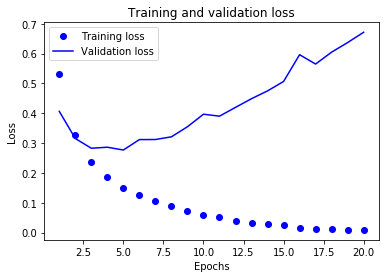

In [24]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc))

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

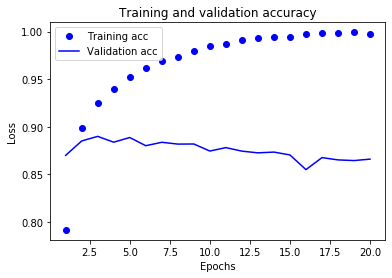

In [27]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
'''First test -------> 88,54%'''
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(15000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 34s 1ms/step - loss: 0.4419 - acc: 0.8283
Epoch 2/4
25000/25000 [==============================] - 4s 173us/step - loss: 0.2453 - acc: 0.9151
Epoch 3/4
25000/25000 [==============================] - 4s 169us/step - loss: 0.1802 - acc: 0.9374
Epoch 4/4
25000/25000 [==============================] - 15s 606us/step


In [16]:
results

[0.2981128520774841, 0.883]

In [30]:
model.predict(x_test)

array([[0.2319393 ],
       [0.999668  ],
       [0.93676156],
       ...,
       [0.12627712],
       [0.06764494],
       [0.69667363]], dtype=float32)

In [31]:
'''Test with more layers -----------> 87%'''
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 140us/step - loss: 0.4832 - acc: 0.8054 3s - loss: 0.6384 - a - ETA: 2s -
Epoch 2/4
25000/25000 [==============================] - 3s 113us/step - loss: 0.2641 - acc: 0.9059
Epoch 3/4
25000/25000 [==============================] - 3s 114us/step - loss: 0.2012 - acc: 0.9279
Epoch 4/4
25000/25000 [==============================] - 3s 128us/step


In [32]:
results

[0.3046692658472061, 0.87992]

In [33]:
'''Test with more layers, one with smaller space ---------> 85%'''
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 3s 135us/step - loss: 0.4693 - acc: 0.8046 2s - loss: 0.5729 - acc: 0.728 - ETA: 1s - l
Epoch 2/4
25000/25000 [==============================] - 3s 114us/step - loss: 0.2572 - acc: 0.9091
Epoch 3/4
25000/25000 [==============================] - 3s 118us/step - loss: 0.1958 - acc: 0.9293 0s - loss: 0.19
Epoch 4/4
25000/25000 [==============================] - 3s 127us/step


[0.3874945249986649, 0.8544]

In [34]:
'''Test with more layers, one larger, one smaller -------------> 88%, but less than the initial test'''
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 137us/step - loss: 0.5102 - acc: 0.7756
Epoch 2/4
25000/25000 [==============================] - 3s 113us/step - loss: 0.2794 - acc: 0.9050
Epoch 3/4
25000/25000 [==============================] - 3s 113us/step - loss: 0.2021 - acc: 0.9293
Epoch 4/4
25000/25000 [==============================] - 3s 123us/step


In [35]:
results

[0.30944207631587983, 0.881]

In [39]:
'''Test with one smaller -----------> 88,2%'''
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 3s 136us/step - loss: 0.4468 - acc: 0.8198 0s - loss: 0.4681 - acc
Epoch 2/4
25000/25000 [==============================] - 3s 112us/step - loss: 0.2603 - acc: 0.9111
Epoch 3/4
25000/25000 [==============================] - 3s 113us/step - loss: 0.2007 - acc: 0.9291
Epoch 4/4
25000/25000 [==============================] - 3s 123us/step


[0.29616600351333616, 0.8826]

In [40]:
'''Test with mse -----------> 88,52%'''
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='mse',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 3s 137us/step - loss: 0.1624 - acc: 0.8170
Epoch 2/4
25000/25000 [==============================] - 3s 114us/step - loss: 0.0855 - acc: 0.9065
Epoch 3/4
25000/25000 [==============================] - 3s 112us/step - loss: 0.0627 - acc: 0.9279
Epoch 4/4
25000/25000 [==============================] - 3s 130us/step


[0.0845712063217163, 0.88528]

In [1]:
'''multiple tests'''
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

NameError: name 'models' is not defined